# Import Required Library !

This cell imports the necessary libraries for image processing (cv2), numerical operations (numpy), plotting (matplotlib), machine learning (tensorflow), and operating system interactions (os).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Load MNIST Dataset

This cell loads the MNIST dataset, a set of handwritten digits commonly used for training and testing machine learning models.

In [ ]:
mnist = tf.keras.datasets.mnist

# Split Dataset into Training and Testing Sets

The dataset is split into training data (x_train, y_train) and testing data (x_test, y_test).

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Normalize the Dataset

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
x_train, x_val = x_train[:48000], x_train[48000:]
y_train, y_val = y_train[:48000], y_train[48000:]

# Define the Model Architecture

This cell defines the neural network architecture using the Sequential API. The model consists of:


1. A flattening layer to transform the 2D input into 1D.
2. Two fully connected layers with 128 neurons each and ReLU activation.
3. An output layer with 10 neurons and softmax activation for classification.

In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [ ]:
history = model.fit(x_train, y_train, epochs= 5, validation_data=(x_val, y_val))


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.7995 - loss: 0.6194 - val_accuracy: 0.9762 - val_loss: 0.0764
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9677 - loss: 0.1137 - val_accuracy: 0.9830 - val_loss: 0.0547
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9774 - loss: 0.0813 - val_accuracy: 0.9841 - val_loss: 0.0572
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9814 - loss: 0.0656 - val_accuracy: 0.9870 - val_loss: 0.0454
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9866 - loss: 0.0470 - val_accuracy: 0.9875 - val_loss: 0.0425


In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)


In [ ]:
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

# Save the Models

In [ ]:
model.save('number-recognition.keras')

# Load the Models

In [ ]:
model = tf.keras.models.load_model('number-recognition.keras')

# Evaluate the Model on the Test Data

In [ ]:
loss,accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9864 - loss: 0.0418


# Display Loss and Accuracy

In [ ]:
print(loss)
print(accuracy)

0.03451014682650566
0.989300012588501


# Plot Accuracy

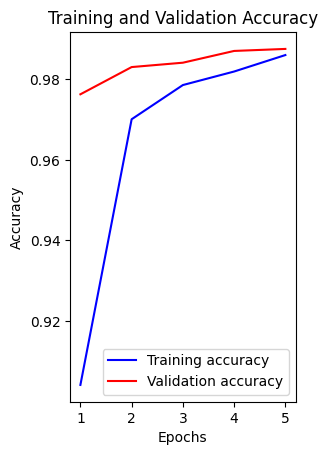

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss

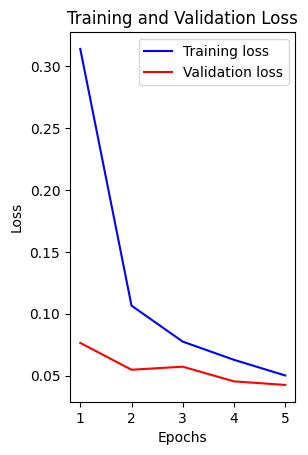

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Test Model on Custom Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Kemungkinan angka 1


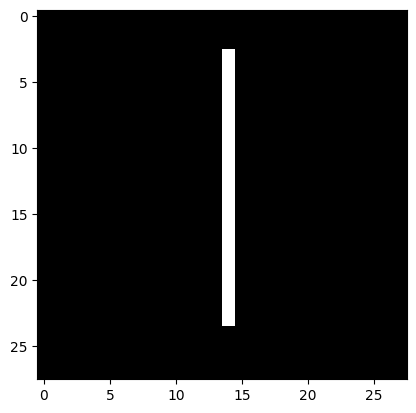

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Kemungkinan angka 0


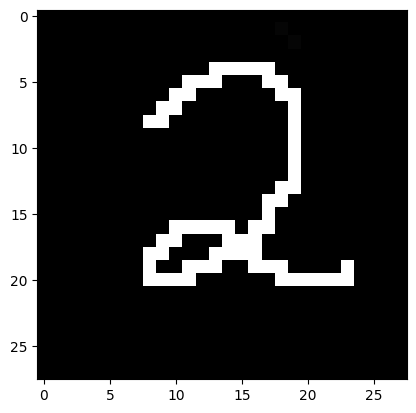

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Kemungkinan angka 5


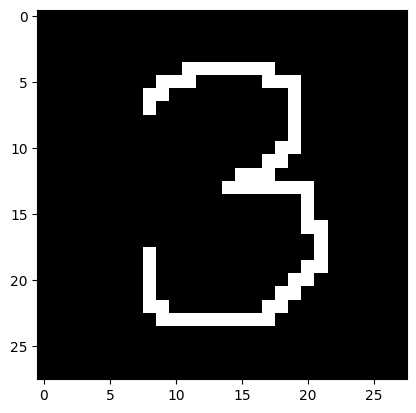

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Kemungkinan angka 1


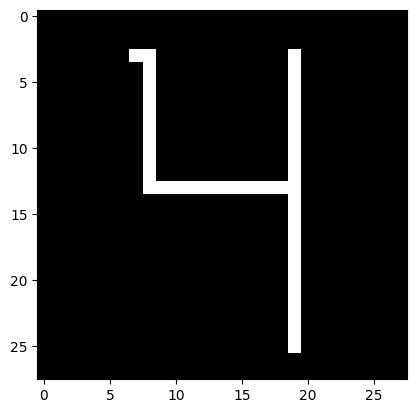

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Kemungkinan angka 5


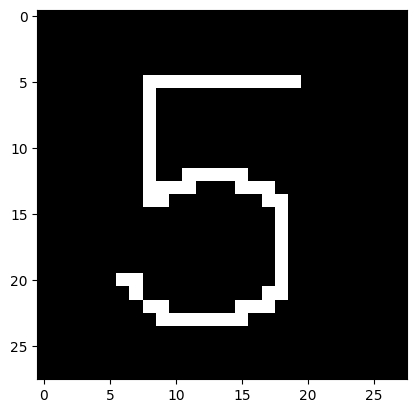

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Kemungkinan angka 5


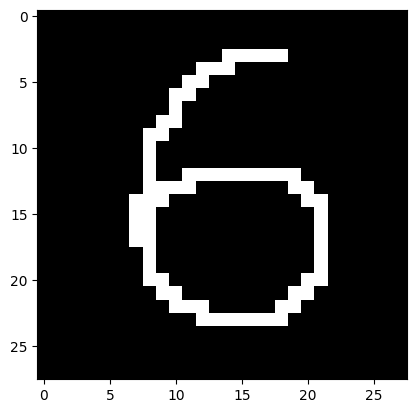

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Kemungkinan angka 7


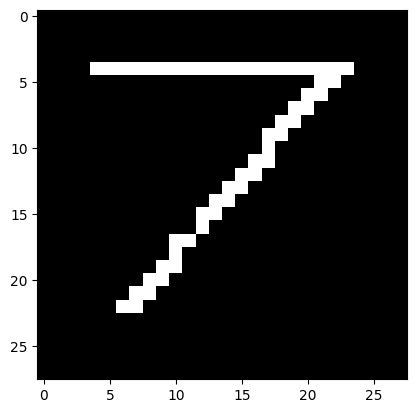

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Kemungkinan angka 8


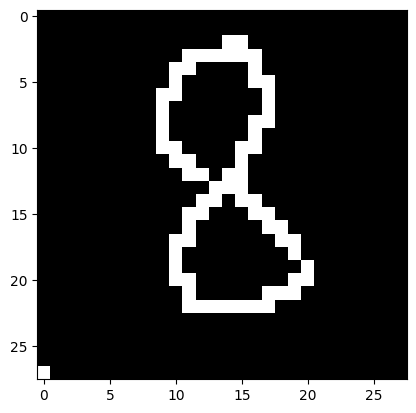

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Kemungkinan angka 5


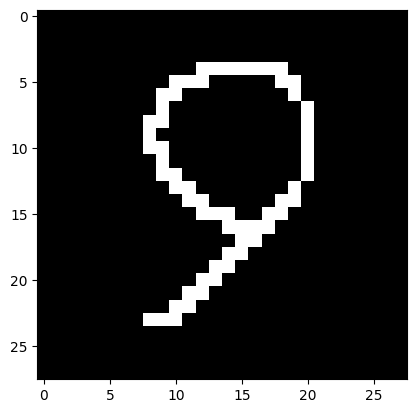

In [ ]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
  try:
    img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"Kemungkinan angka {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_number += 1